In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving MDS.csv to MDS.csv


In [ ]:
#reading the file
df = pd.read_csv('MDS.csv')
#dropping the unneccessory coulmn
drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid','Formal Charge','Formal Charge (pos)','Formal Charge (neg)']
df.drop(drop_columns, axis=1,inplace =True)
X= df.drop(['Luciferase activity (RLU) *'],axis = 1)#.to_numpy()
y= df['Luciferase activity (RLU) *']#.to_numpy()
X


,Total Molweight,AMW,ExactMW,cLogP,SlogP,XLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,NumHBD,NumHBA,NumLipinskiHBA,NumLipinskiHBD,Total Surface Area,Polar Surface Area,TPSA,Rotatable Bonds,NumRotatableBonds,Lipinski's Rule of Five,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
0,762.127,762.133,761.468258,6.3230,5.7781,6.865,4.21,-4.055,11,0,0,13,11,0,634.70,165.52,114.92,36,32,4,3863,0.534,0.565,10.82,1.004
1,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3860,0.508,0.581,10.98,0.995
2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3863,0.517,0.569,10.74,1.061
3,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3863,0.548,0.563,10.70,0.935
4,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,3860,0.502,0.576,10.88,1.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2129.160,2129.178,2127.272029,23.0950,21.4322,27.294,9.60,-16.274,28,0,0,34,28,0,1788.00,480.36,328.56,117,105,4,3759,1.133,0.745,19.40,1.493
87,2104.970,2104.986,2103.084228,20.0680,18.7442,22.236,9.60,-13.538,28,0,0,34,28,0,1775.80,480.36,328.56,105,93,4,3762,0.965,0.752,19.65,1.232
88,2285.390,2285.406,2283.365930,26.5300,23.9048,28.248,10.92,-16.610,28,0,0,34,28,0,1910.70,480.36,328.56,111,99,4,3759,1.103,0.761,20.34,1.187
89,2273.290,2273.310,2271.272029,27.3450,23.4254,22.476,10.92,-15.026,28,0,0,34,28,0,1901.40,480.36,328.56,105,93,4,3754,1.018,0.760,19.95,1.251


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df.shape


(91, 26)

In [ ]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(abs(X),y)

In [ ]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,Total Molweight
1,AMW
2,ExactMW
3,cLogP
4,SlogP
5,XLogP
6,Mannhold LogP
7,cLogS
8,H-Acceptors
9,H-Donors


In [ ]:

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Total Molweight,6436.126685
1,AMW,6436.189730
2,ExactMW,6430.207838
3,cLogP,50.761502
4,SlogP,49.527613
5,XLogP,74.420225
6,Mannhold LogP,15.599116
7,cLogS,47.539115
8,H-Acceptors,97.383553
9,H-Donors,6.956618


In [ ]:
features_rank.nlargest(10,'Score')

,Features,Score
1,AMW,6436.189730
0,Total Molweight,6436.126685
2,ExactMW,6430.207838
14,Total Surface Area,5207.414269
15,Polar Surface Area,1826.911857
16,TPSA,1240.439218
17,Rotatable Bonds,398.461083
18,NumRotatableBonds,352.150162
11,NumHBA,120.460333
8,H-Acceptors,97.383553


In [ ]:
#feature importance
#This technique gives you a score for each feature of your data,the higher the score mor relevant it is
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.03234824 0.03136814 0.0384126  0.0362717  0.02563815 0.04606985
 0.02316319 0.03989058 0.04624008 0.00471109 0.00434725 0.04022233
 0.04534853 0.00328152 0.02663482 0.03518769 0.03811407 0.04517128
 0.05020843 0.02181604 0.06956544 0.07770811 0.07247541 0.0740458
 0.07175969]


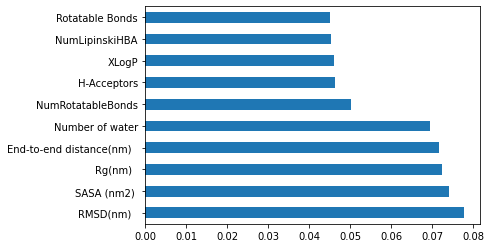

In [ ]:
#ranked_features=pd.Series(model.feature_importances_,index=X.columns)
#ranked_features.nlargest(10).plot(kind='barh')
#plt.show()
(pd.Series(model.feature_importances_,index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [ ]:

df.corr()

,Luciferase activity (RLU) *,Total Molweight,AMW,ExactMW,cLogP,SlogP,XLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,NumHBD,NumHBA,NumLipinskiHBA,NumLipinskiHBD,Total Surface Area,Polar Surface Area,TPSA,Rotatable Bonds,NumRotatableBonds,Lipinski's Rule of Five,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
Luciferase activity (RLU) *,1.000000,0.492469,0.492469,0.492465,0.316011,0.361244,0.439803,0.401339,-0.452632,0.550710,-0.019871,-0.019871,0.549907,0.550710,-0.019871,0.486845,0.546990,0.547209,0.538639,0.536525,0.569514,-0.510181,0.582700,0.598151,0.538601,-0.148370
Total Molweight,0.492469,1.000000,1.000000,1.000000,0.901774,0.932947,0.949189,0.966430,-0.971340,0.964972,-0.093973,-0.093973,0.965032,0.964972,-0.093973,0.999639,0.961815,0.960014,0.988273,0.989068,0.599749,-0.967905,0.880704,0.968744,0.995112,0.217019
AMW,0.492469,1.000000,1.000000,1.000000,0.901774,0.932947,0.949188,0.966430,-0.971340,0.964972,-0.093972,-0.093972,0.965032,0.964972,-0.093972,0.999639,0.961816,0.960014,0.988273,0.989068,0.599749,-0.967905,0.880703,0.968744,0.995112,0.217020
ExactMW,0.492465,1.000000,1.000000,1.000000,0.901783,0.932954,0.949193,0.966435,-0.971343,0.964967,-0.093971,-0.093971,0.965027,0.964967,-0.093971,0.999640,0.961810,0.960008,0.988270,0.989066,0.599753,-0.967902,0.880702,0.968744,0.995111,0.217016
cLogP,0.316011,0.901774,0.901774,0.901783,1.000000,0.995283,0.960499,0.980412,-0.958111,0.757901,-0.085638,-0.085638,0.758188,0.757901,-0.085638,0.911703,0.755851,0.754025,0.848175,0.857559,0.464022,-0.817514,0.796115,0.842498,0.879697,0.218974
SlogP,0.361244,0.932947,0.932947,0.932954,0.995283,1.000000,0.980098,0.990405,-0.979439,0.807578,-0.100045,-0.100045,0.808309,0.807578,-0.100045,0.941332,0.806822,0.804454,0.890466,0.898523,0.473790,-0.859081,0.833065,0.874567,0.913036,0.235166
XLogP,0.439803,0.949189,0.949188,0.949193,0.960499,0.980098,1.000000,0.974801,-0.991550,0.853343,-0.102722,-0.102722,0.854173,0.853343,-0.102722,0.955223,0.852965,0.850513,0.931273,0.938550,0.497103,-0.893558,0.865047,0.893994,0.933049,0.249808
Mannhold LogP,0.401339,0.966430,0.966430,0.966435,0.980412,0.990405,0.974801,1.000000,-0.981825,0.865496,-0.104587,-0.104587,0.865434,0.865496,-0.104587,0.972268,0.861044,0.858966,0.925578,0.931231,0.541396,-0.902195,0.846007,0.920117,0.951550,0.205536
cLogS,-0.452632,-0.971340,-0.971340,-0.971343,-0.958111,-0.979439,-0.991550,-0.981825,1.000000,-0.889916,0.052924,0.052924,-0.890958,-0.889916,0.052924,-0.975821,-0.893250,-0.891988,-0.956601,-0.962259,-0.525121,0.919795,-0.885457,-0.922478,-0.959106,-0.271682
H-Acceptors,0.550710,0.964972,0.964972,0.964967,0.757901,0.807578,0.853343,0.865496,-0.889916,1.000000,-0.075566,-0.075566,0.999917,1.000000,-0.075566,0.958236,0.997261,0.996016,0.981816,0.977492,0.629231,-0.967340,0.850277,0.953642,0.971177,0.203536


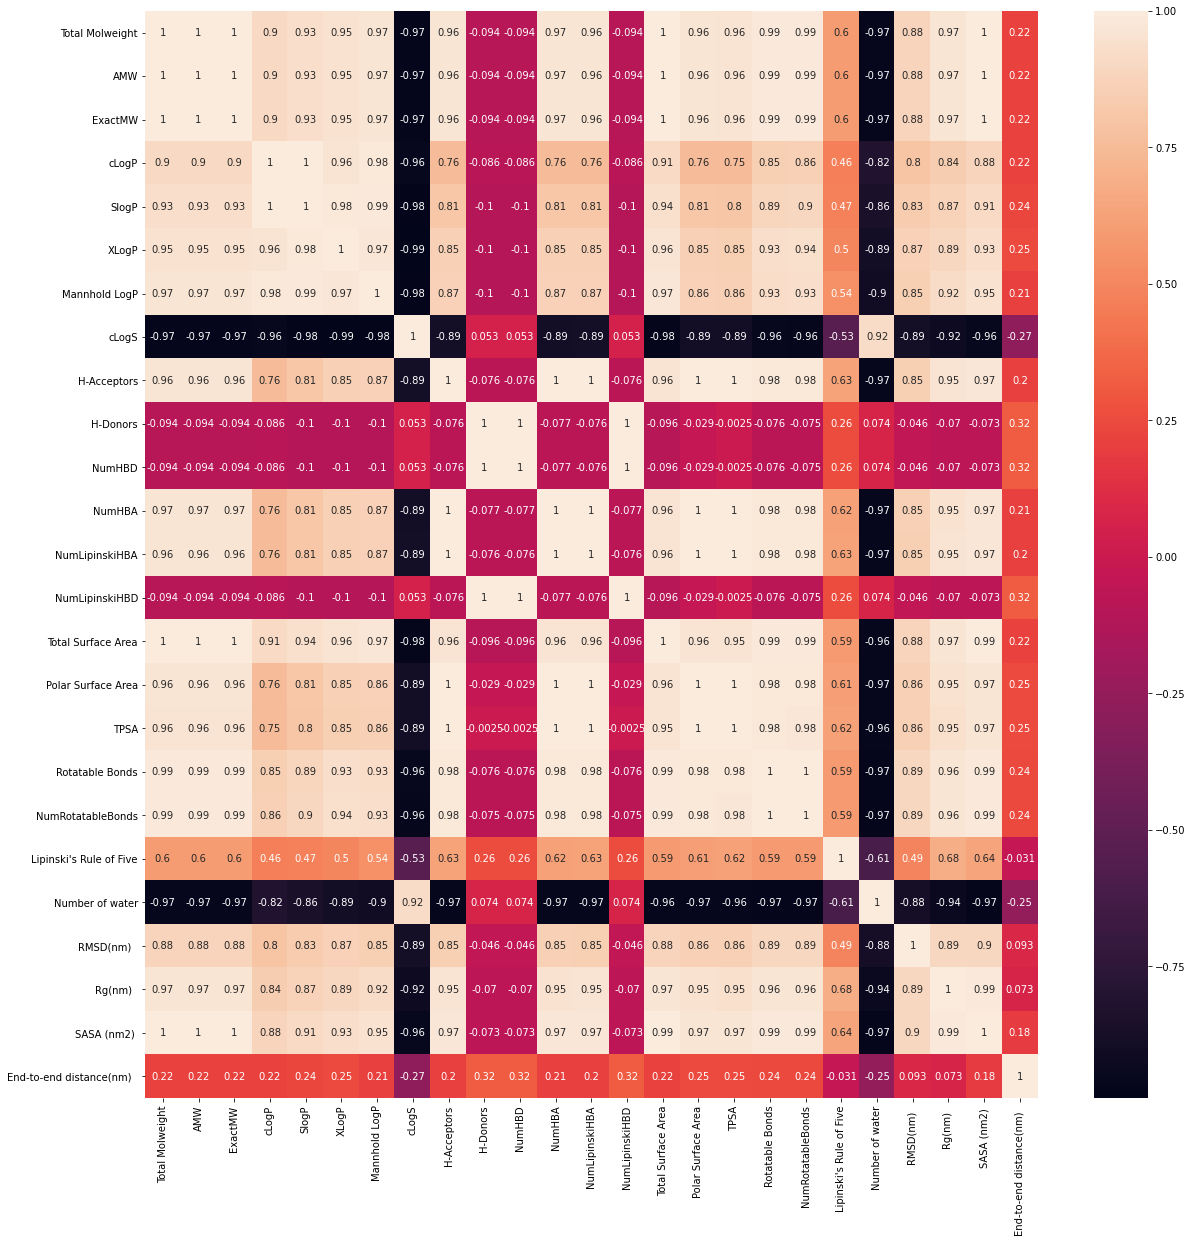

In [ ]:
import seaborn as sns
corr=X.iloc[:,:].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
#removing The correlated
threshold=0.90
#drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid']
                #,'H-Donors','NumHBD','Formal Charge',
                #'Formal Charge (pos)','Formal Charge (neg)' ,'Number of lipid','AMW','ExactMW','SlogP','XLogP','NumHBA','NumLipinskiHBA','NumRotatableBonds']
#Lipid_prop_data.drop(drop_columns, axis=1,inplace =True)
# 7 개 feature를 제외하고 나머지 feature 삭제
#add_drop_columns = ['AMW', 'ExactMW','SlogP','XLogP', 'Mannhold LogP','NumHBD','NumHBA','NumLipinskiHBA', 'NumLipinskiHBD',
               #'Total Surface Area','Polar Surface Area','Rotatable Bonds',"Lipinski's Rule of Five" ]
#X.drop(add_drop_columns, axis=1,inplace =True)


In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr=correlation(X,threshold)
len(corr)
corr

{'AMW',
 'ExactMW',
 'H-Acceptors',
 'Mannhold LogP',
 'NumHBA',
 'NumHBD',
 'NumLipinskiHBA',
 'NumLipinskiHBD',
 'NumRotatableBonds',
 'Number of water',
 'Polar Surface Area',
 'Rg(nm)  ',
 'Rotatable Bonds',
 'SASA (nm2) ',
 'SlogP',
 'TPSA',
 'Total Surface Area',
 'XLogP',
 'cLogP',
 'cLogS'}

In [ ]:
X.drop(corr,axis=1)


,Total Molweight,H-Donors,Lipinski's Rule of Five,RMSD(nm),End-to-end distance(nm)
0,762.127,0,4,0.534,1.004
1,758.095,0,4,0.508,0.995
2,758.095,0,4,0.517,1.061
3,758.095,0,4,0.548,0.935
4,758.095,0,4,0.502,1.025
...,...,...,...,...,...
86,2129.160,0,4,1.133,1.493
87,2104.970,0,4,0.965,1.232
88,2285.390,0,4,1.103,1.187
89,2273.290,0,4,1.018,1.251


In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
#Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. 
#It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
mutual_info=mutual_info_classif(X,y)


In [ ]:
#mutual information score will give the intuitive understanding of the descriptors and target 
#more score means  more relation of input and output
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

TPSA                         0.678567
NumLipinskiHBA               0.666894
NumHBA                       0.636687
H-Acceptors                  0.633317
Polar Surface Area           0.590368
Rg(nm)                       0.542777
Rotatable Bonds              0.525704
Total Surface Area           0.516466
Total Molweight              0.511490
AMW                          0.490924
ExactMW                      0.487281
SASA (nm2)                   0.443638
NumRotatableBonds            0.430526
Number of water              0.403158
RMSD(nm)                     0.388861
cLogS                        0.383341
SlogP                        0.322612
Mannhold LogP                0.315109
XLogP                        0.312181
cLogP                        0.303431
Lipinski's Rule of Five      0.187123
End-to-end distance(nm)      0.155232
NumLipinskiHBD               0.099051
H-Donors                     0.084228
NumHBD                       0.040496
dtype: float64